# The Interplay of Compile-time and Run-time Options for Performance Prediction

This notebook follows the order and produce all the figures depicted in the related submission, "The Interplay of Compile-time and Run-time Options for Performance Prediction"

#### First, we import some libraries

In [1]:
# for arrays
import numpy as np

# for dataframes
import pandas as pd

# plots
import matplotlib.pyplot as plt
# high-level plots
import seaborn as sns

# statistics
import scipy.stats as sc
# hierarchical clustering, clusters
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from scipy import stats
# statistical tests
from scipy.stats import mannwhitneyu

# machine learning library
# Principal Component Analysis - determine new axis for representing data
from sklearn.decomposition import PCA
# Random Forests -> vote between decision trees
# Gradient boosting -> instead of a vote, upgrade the same tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
# To add interactions in linear regressions models
from sklearn.preprocessing import PolynomialFeatures
# Elasticnet is an hybrid method between ridge and Lasso
from sklearn.linear_model import LinearRegression, ElasticNet
# To separate the data into training and test
from sklearn.model_selection import train_test_split
# Simple clustering (iterative steps)
from sklearn.cluster import KMeans

# we use it to interact with the file system
import os
# compute time
from time import time

#### We import x264 data

In [2]:
data_dir = "../data/"
name_system = "x264"

list_dir = os.listdir(data_dir+name_system)
list_dir.remove('ctime_options.csv')
list_dir.remove('default')
list_dir

inputs = os.listdir(data_dir+name_system+'/'+list_dir[0])
nb_inputs = len(inputs)

data = dict()

for i in range(len(list_dir)):
    for j in range(len(inputs)):
        loc = data_dir+name_system+'/'+list_dir[i]+'/'+inputs[j]
        data[list_dir[i], inputs[j]] = pd.read_csv(loc)

In [4]:
for j in range(len(inputs)):
    time_inputs = []
    for i in range(len(list_dir)):
        time_inputs.append(np.median(data[list_dir[i], inputs[j]]["time"]))
    print(inputs[j], np.median(time_inputs))

original_videos_LiveMusic_360P_LiveMusic_360P-1d94.csv 67.7075
original_videos_CoverSong_360P_CoverSong_360P-5d20.csv 52.212500000000006
original_videos_MusicVideo_360P_MusicVideo_360P-5699.csv 60.7125
original_videos_LyricVideo_360P_LyricVideo_360P-5e87.csv 8.553999999999998
original_videos_Sports_360P_Sports_360P-4545.csv 91.023
original_videos_Gaming_360P_Gaming_360P-56fe.csv 72.642
original_videos_Animation_480P_Animation_480P-087e.csv 42.426500000000004
original_videos_Lecture_360P_Lecture_360P-114f.csv 42.426


#### Variable of interest

In [5]:
dim = "fps"
inputs_index = 1

#### Figure 1a

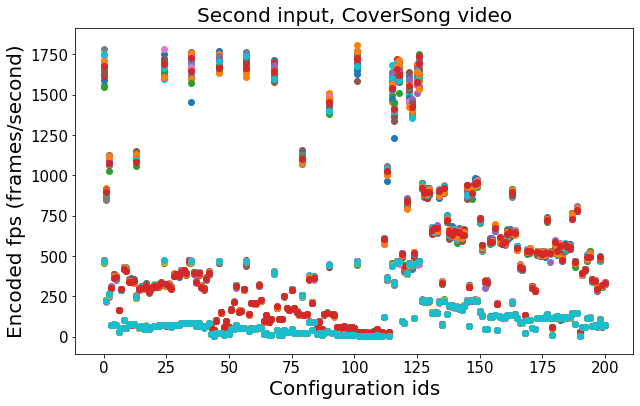

In [6]:
plt.figure(figsize=(10,6))
plt.title("Second input, CoverSong video", size =20)
plt.ylabel("Encoded fps (frames/second)", size=20)
plt.xlabel("Configuration ids", size=20)
plt.yticks(size=15)
plt.xticks(size=15)

for i in range(len(list_dir)):
    df = data[list_dir[i], inputs[inputs_index]]
    plt.scatter(range(df.shape[0]), df[dim])

plt.savefig('../results/'+name_system+'/scatterplot_'+dim+'_'+inputs[inputs_index][:-4]+'.png')
plt.show()

In [7]:
dim = "fps"
inputs_index = 7
print(inputs[inputs_index])

original_videos_Lecture_360P_Lecture_360P-114f.csv


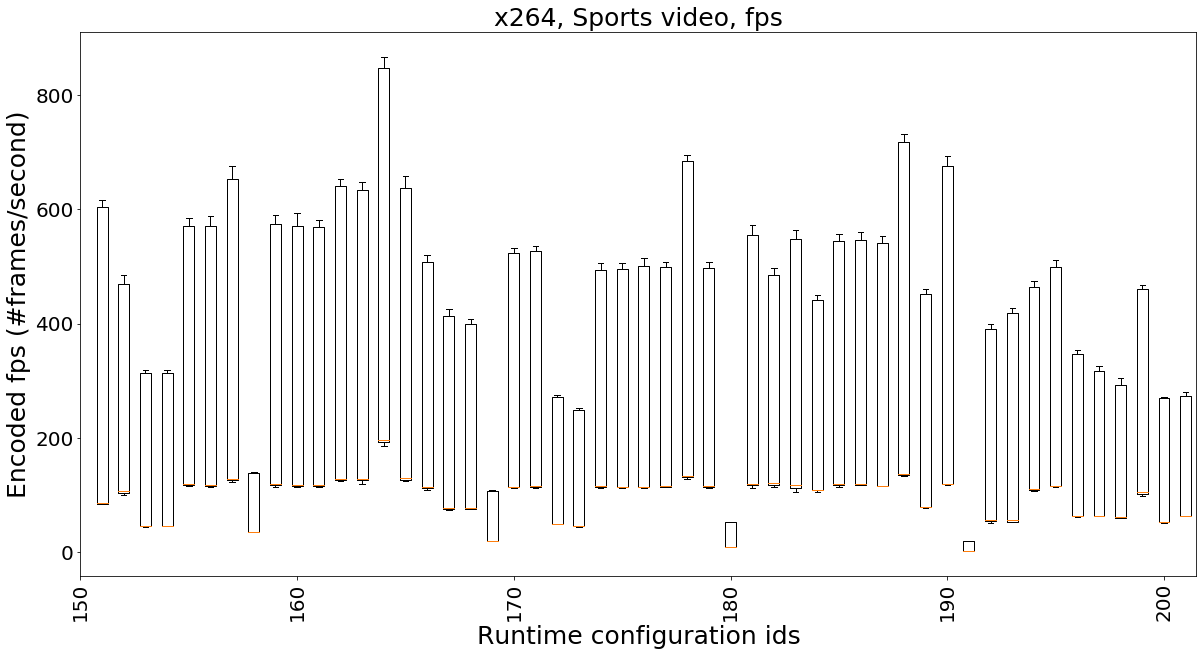

In [12]:
listDim = []
for i in range(len(list_dir)):
    df = data[list_dir[i], inputs[inputs_index]]
    listDim.append(df[dim])

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

plt.figure(figsize=(20,10))

plt.title("x264, Sports video, fps", size = 25)
plt.ylabel("Encoded fps (#frames/second)", size = 25)
plt.xlabel("Runtime configuration ids", size=25)

plt.boxplot(transposed_listDim[150:201])
plt.xticks([k for k in range(51) if k%10==0],[k for k in range(150,201) if k%10==0], 
           rotation='vertical', size =20)
plt.yticks(size=20)
plt.savefig("../results/boxplot_"+name_system+"_"+dim+".png")
plt.show()

In [184]:
dim = "time"
inputs_index = 2
print(inputs[inputs_index])

original_videos_MusicVideo_360P_MusicVideo_360P-5699.csv


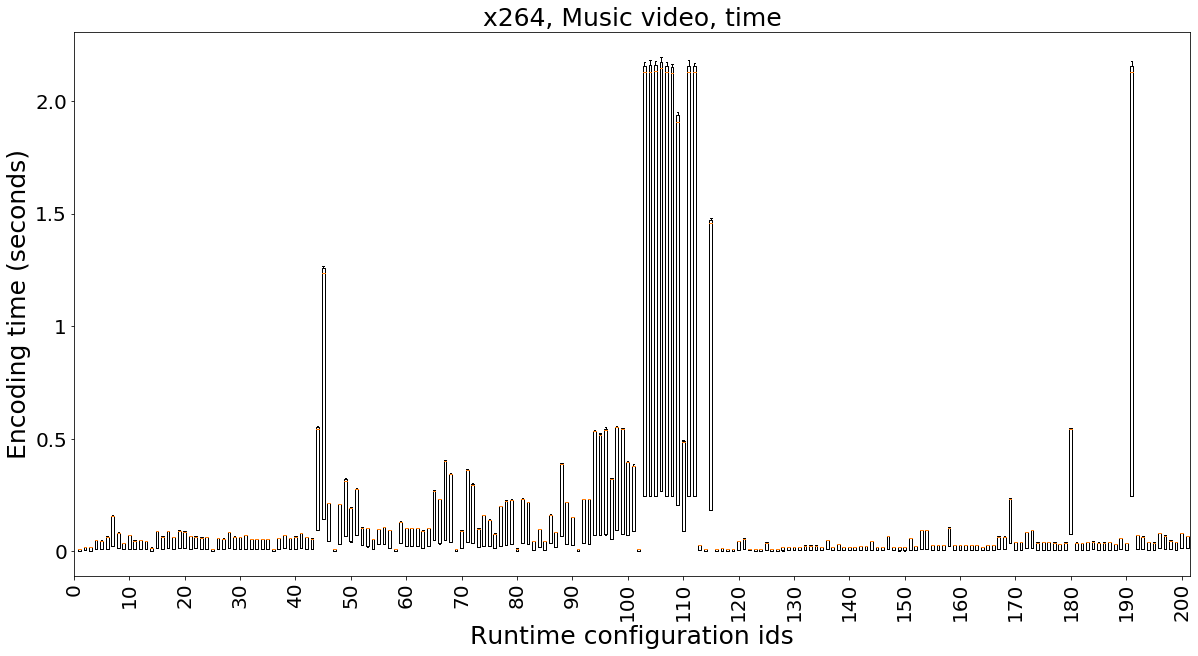

In [185]:
listDim = []
for i in range(len(list_dir)):
    df = data[list_dir[i], inputs[inputs_index]]
    listDim.append(df[dim])

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

plt.figure(figsize=(20,10))

plt.title("x264, Music video, time", size = 25)
plt.ylabel("Encoding time (seconds)", size = 25)
    
plt.xlabel("Runtime configuration ids", size=25)
plt.boxplot(transposed_listDim)
plt.xticks([k for k in range(201) if k%10==0],[k for k in range(201) if k%10==0], 
           rotation='vertical', size =20)
plt.yticks([0, 500, 1000, 1500, 2000], [0, 0.5, 1, 1.5, 2.0],
           size=20)
plt.savefig("../results/boxplot_"+name_system+"_"+dim+".png")
plt.show()

In [186]:
data[list_dir[2], inputs[inputs_index]]["time"]

0       2.141
1       4.150
2       3.205
3       9.746
4       9.151
        ...  
196    11.908
197     8.607
198     6.703
199    13.318
200    13.359
Name: time, Length: 201, dtype: float64

#### Figure 1b : compute the Spearman correlation

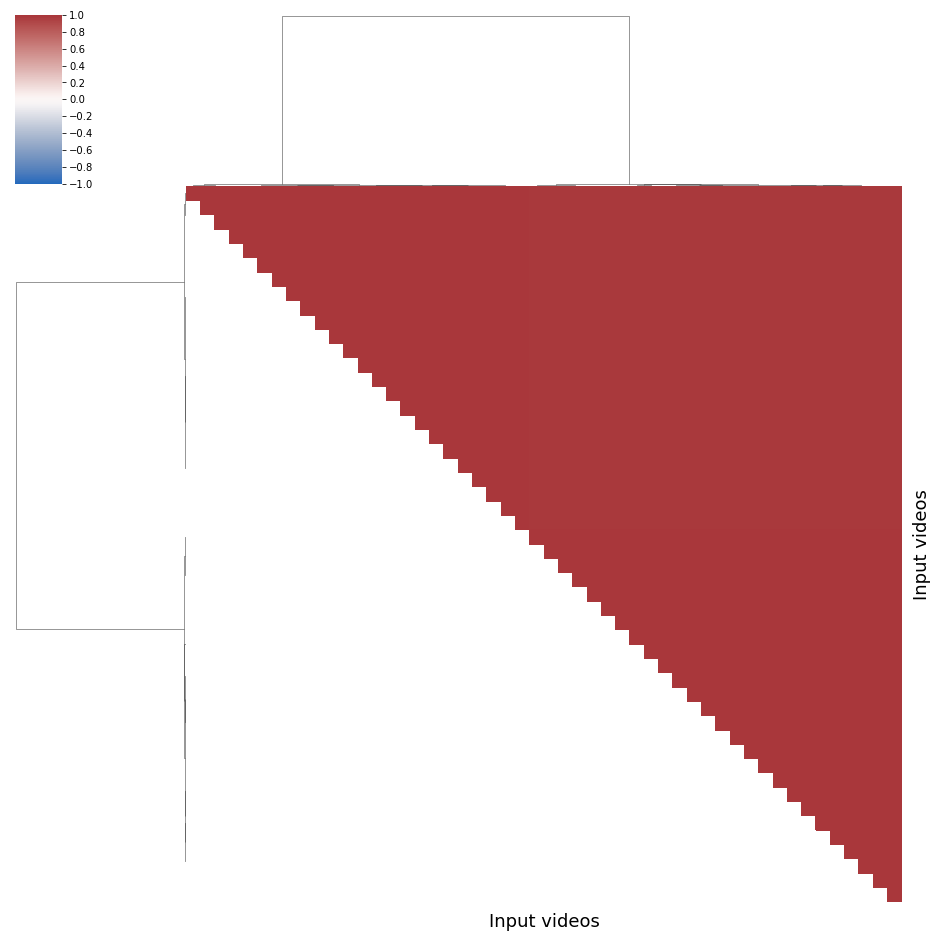

In [187]:
# number of videos
nbVideos = len(list_dir)
    
# matrix of coorelations
corrSpearman = [[0 for x in range(nbVideos)] for y in range(nbVideos)]

for i in range(nbVideos):
    for j in range(nbVideos):
        # A distribution of bitrates will have a correlaiton of 1 with itself
        if (i == j):
            corrSpearman[i][j] = 1
        else:
            # we compute the Spearman correlation between the input video i and the input video j
            corrSpearman[i][j] = sc.spearmanr(data[list_dir[i], inputs[inputs_index]][dim],
                                            data[list_dir[j], inputs[inputs_index]][dim]).correlation
# We define a function to plot the correlogram
def plot_correlationmatrix_dendogram(corr, img_name, ticks, method= 'ward'):
    # inputs : a correlation matrix, or a matrix with quantitative values
    # a name for the image
    # the aggregation method
    # output : a plot of an ordered correlogram with dendograms
    
    # we transform our matrix into a dataframe
    df = pd.DataFrame(corr)
    
    # group the videos, we choose the ward method 
    # single link method (minimum of distance) leads to numerous tiny clusters
    # centroid or average tend to split homogeneous clusters
    # and complete link aggregates unbalanced groups. 
    links = linkage(df, method=method,)
    order = leaves_list(links)
    
    # we order the correlation following the aggregation clustering
    mask = np.zeros_like(corr, dtype=np.bool)
    
    for i in range(nbVideos):
        for j in range(nbVideos):
            # Generate a mask for the upper triangle
            if i>j:
                mask[order[i]][order[j]] = True
    
    # seaborn clustermap plots a nice graph combining the correlogram and dendograms
    # cmap is the colormap, mask hides the lower triangular, method is the aggregation method,
    # linewidth is set to 0 because otherwise we can't see squre colors
    # figsize is the size of figure
    # we cannot print 1400 ticks, wo we hide them
    # to not fool the reviewers, we set the minimum to -1, to plot the full range of correlation
    # -0.69 would give a false impression of high input sensitivity
    g = sns.clustermap(df, cmap="vlag", mask=mask, method=method,
                   linewidths=0, figsize=(13, 13), cbar_kws={"ticks":ticks}, vmin =-1)
    g.ax_heatmap.set_yticklabels([])
    g.ax_heatmap.set_xticklabels([])
    g.ax_heatmap.tick_params(right=False, bottom=False)
    # abcissa and ordered labels
    g.ax_heatmap.set_xlabel("Input videos", fontsize = 18)
    g.ax_heatmap.set_ylabel("Input videos", fontsize = 18)
    # we save the figure in the result folder
    plt.savefig(img_name)
    # we show the graph
    plt.show()

plot_correlationmatrix_dendogram(corrSpearman, 
                                 "../results/"+name_system+"/corrmatrix-Spearman-"+dim+"-"
                                                    +inputs[inputs_index]+".pdf",
                                 [k/5 for k in np.arange(-10,10,1)], method='ward')

In [188]:
np.mean(corrSpearman)

0.9946023276843229

In [189]:
np.min(corrSpearman)

0.9889012774503306

In [30]:
name_system = "xz"

list_dir = os.listdir(data_dir+name_system)
list_dir.remove('ctime_options.csv')
list_dir.remove('default')
list_dir

inputs = os.listdir(data_dir+name_system+'/'+list_dir[0])
nb_inputs = len(inputs)

data = dict()

for i in range(len(list_dir)):
    for j in range(len(inputs)):
        loc = data_dir+name_system+'/'+list_dir[i]+'/'+inputs[j]
        data[list_dir[i], inputs[j]] = pd.read_csv(loc)

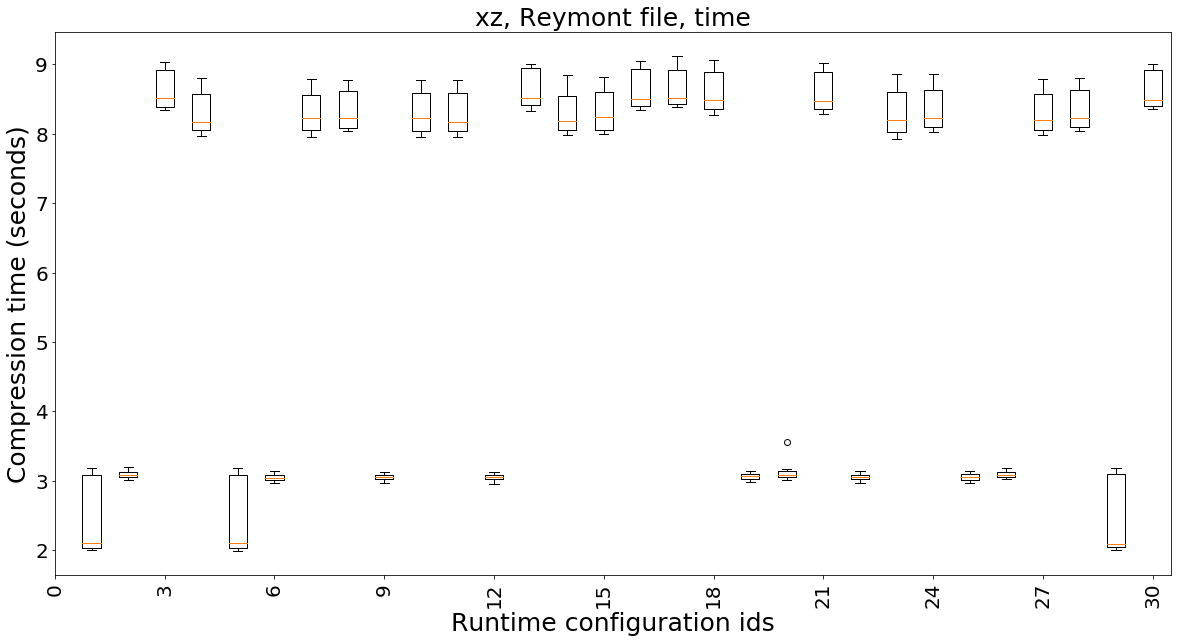

In [31]:
dim = "time"

listDim = []
for i in range(len(list_dir)):
    df = data[list_dir[i], inputs[inputs_index]]
    listDim.append(df[dim])

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

plt.figure(figsize=(20,10))

plt.title("xz, Reymont file, time", size = 25)
plt.ylabel("Compression time (seconds)", size = 25)
    
plt.xlabel("Runtime configuration ids", size=25)
plt.boxplot(transposed_listDim)
plt.xticks([k for k in range(31) if k%3==0], [k for k in range(31) if k%3==0],
           rotation='vertical', size =20)
plt.yticks(size=20)
plt.savefig("../results/boxplot_"+name_system+"_"+dim+".png")
plt.show()

#### nodeJS

In [32]:
name_system = "nodejs"

list_dir = os.listdir(data_dir+name_system)
list_dir.remove('ctime_options.csv')
list_dir.remove('default')
list_dir

inputs = os.listdir(data_dir+name_system+'/'+list_dir[0])
nb_inputs = len(inputs)

data = dict()

for i in range(len(list_dir)):
    for j in range(len(inputs)):
        loc = data_dir+name_system+'/'+list_dir[i]+'/'+inputs[j]
        data[list_dir[i], inputs[j]] = pd.read_csv(loc)
        
default_data = dict()

for j in range(len(inputs)):
    loc = data_dir+name_system+'/'+list_dir[i]+'/'+inputs[j]
    default_data[inputs[j]] = pd.read_csv(loc)

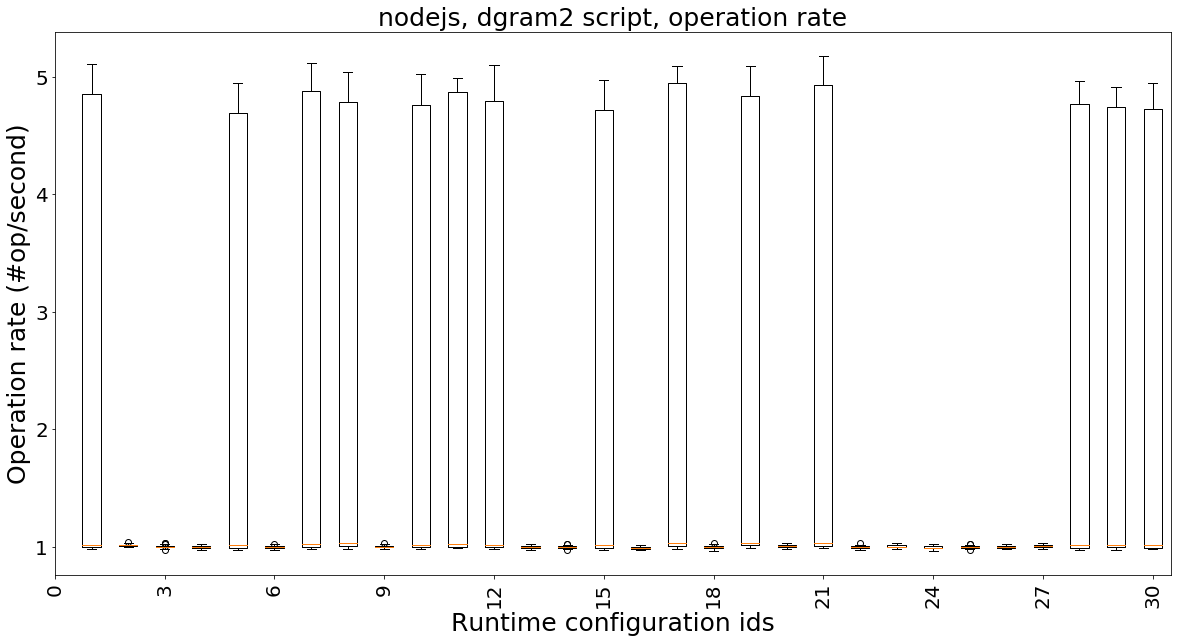

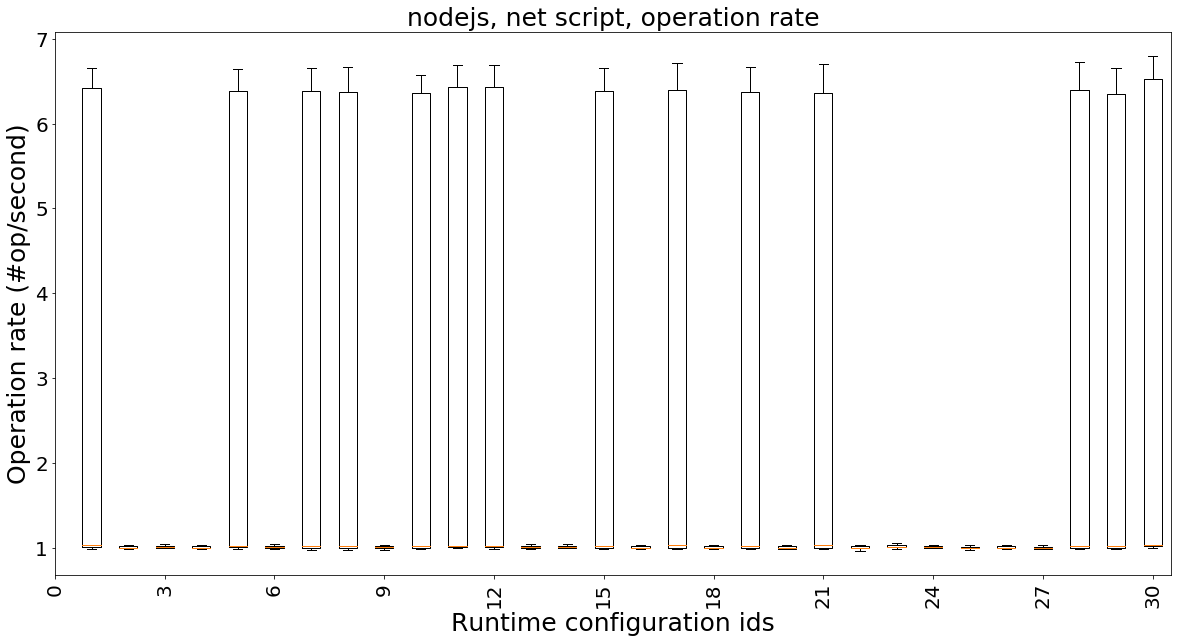

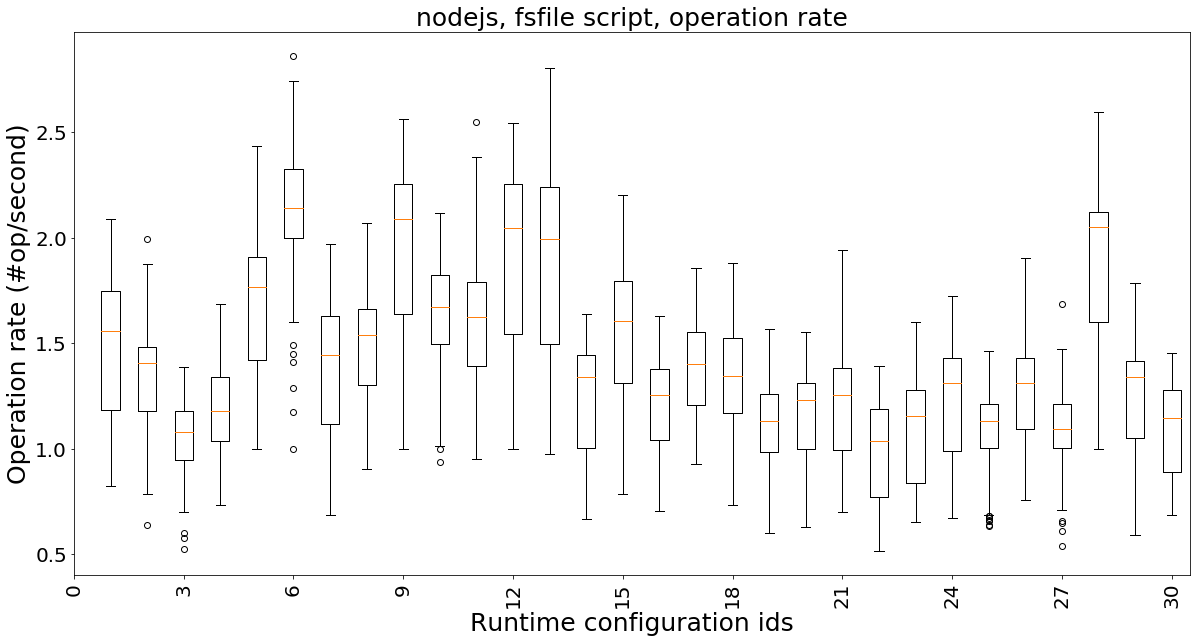

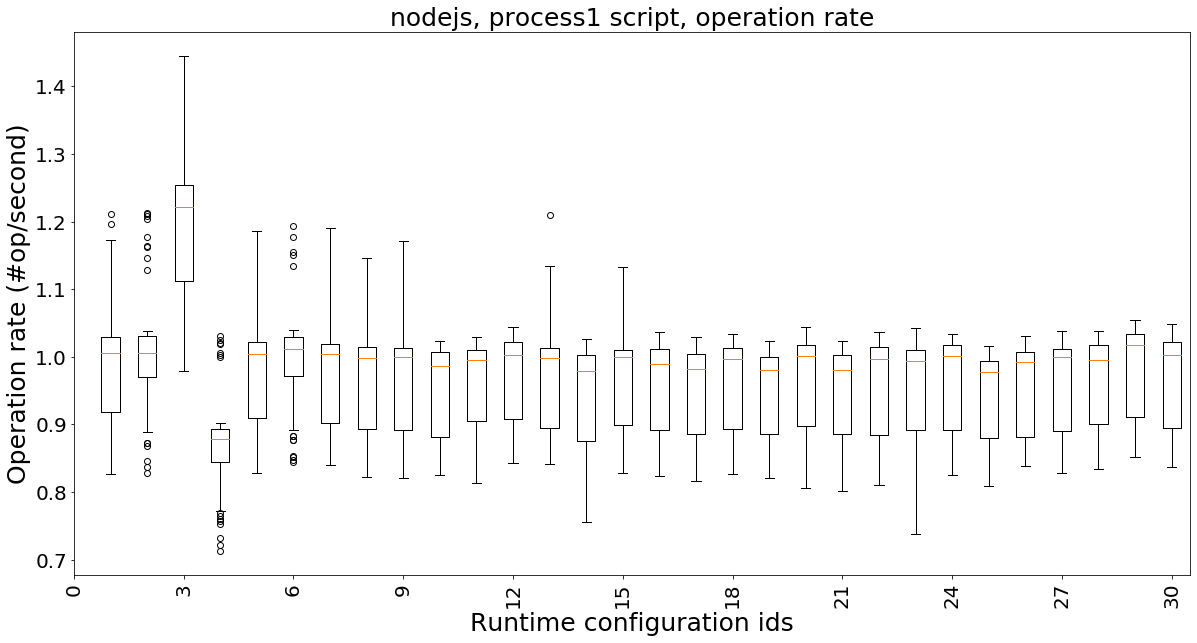

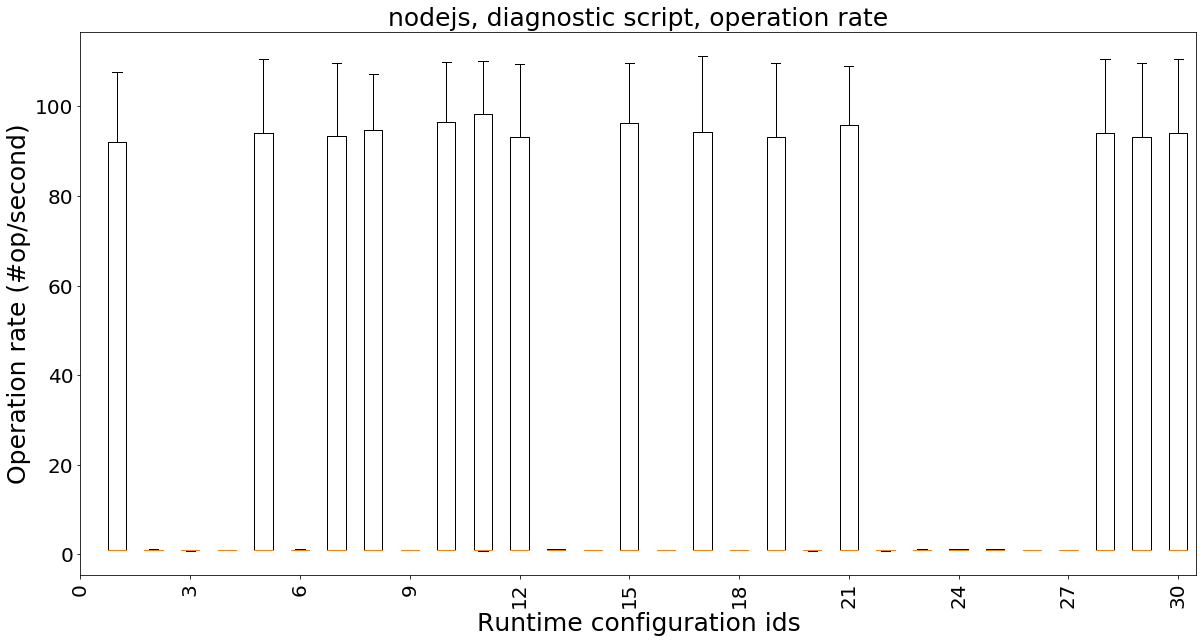

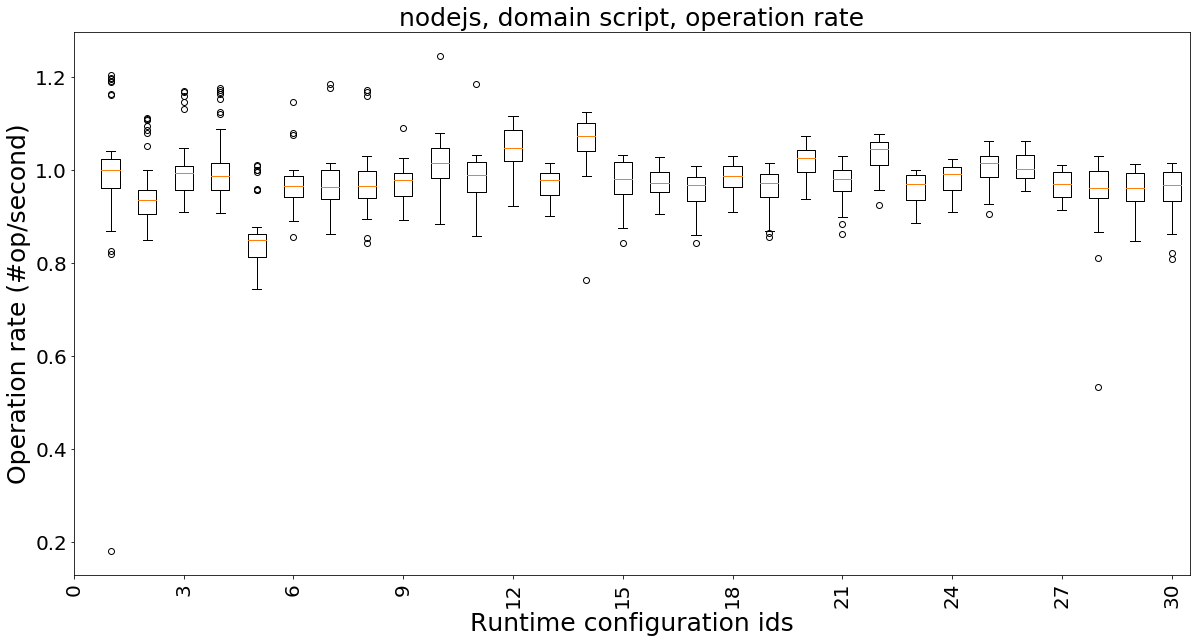

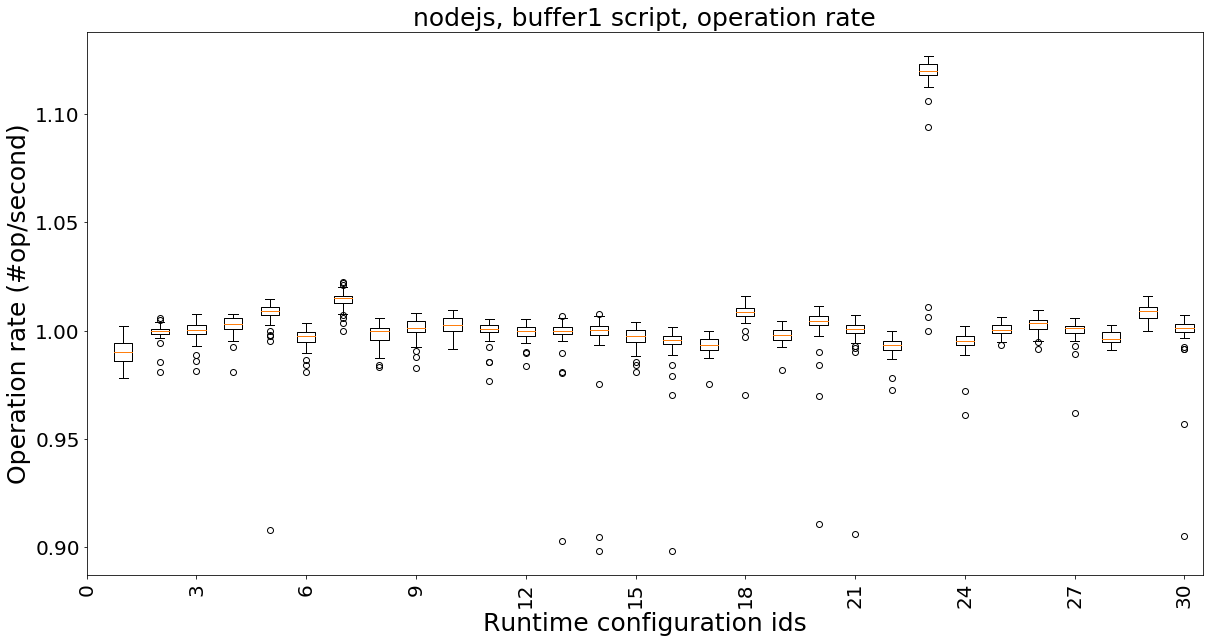

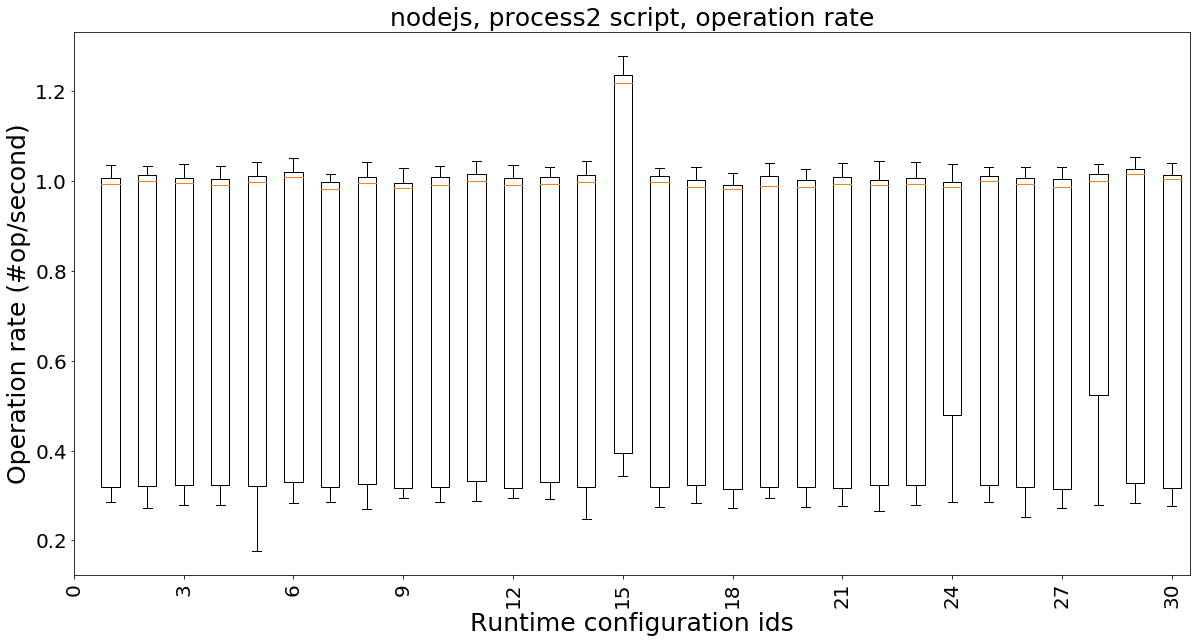

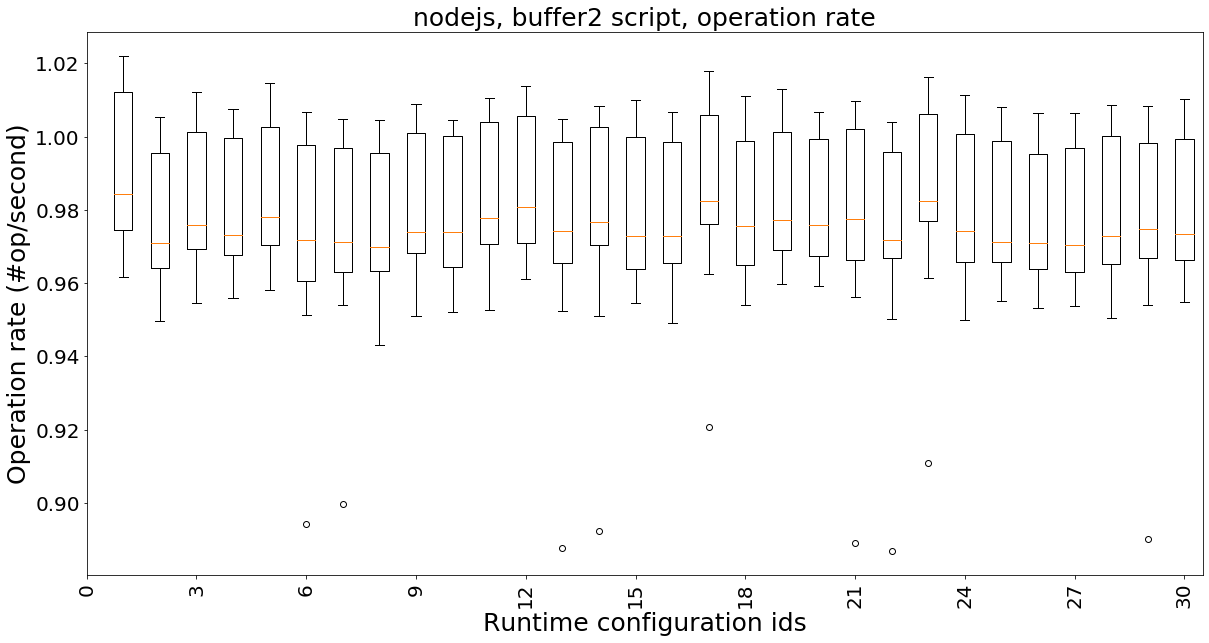

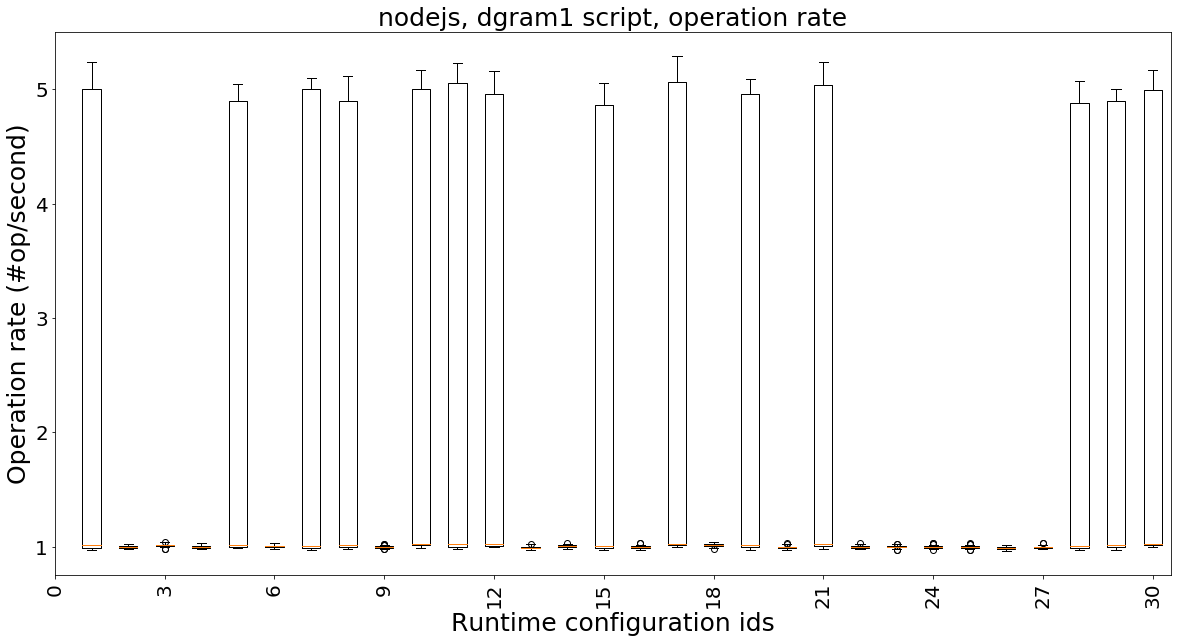

In [33]:
dim = "ops"

for inputs_index in range(len(inputs)):

    listDim = []
    df_def = default_data[inputs[inputs_index]]
    for i in range(len(list_dir)):
        df = data[list_dir[i], inputs[inputs_index]]
        listDim.append(df[dim]/df_def[dim])

    transposed_listDim = []
    for i in range(len(listDim[0])):
        transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

    plt.figure(figsize=(20,10))

    plt.title(name_system+", "+inputs[inputs_index][:-4]+" script, operation rate", size = 25)
    plt.ylabel("Operation rate (#op/second)", size = 25)

    plt.xlabel("Runtime configuration ids", size=25)
    plt.boxplot(transposed_listDim)
    plt.xticks([k for k in range(31) if k%3==0], [k for k in range(31) if k%3==0],
               rotation='vertical', size =20)
    plt.yticks(size=20)
    plt.savefig("../results/"+name_system+"/boxplot_default_"+name_system+"_"+inputs[inputs_index][:-4]+"_"+dim+".png")
    plt.show()